# winequality-white using Support Vector Classifier

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
df = pd.read_csv('winequality-white.csv', sep = ";")
df.shape

(4898, 12)

In [83]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [85]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [86]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [87]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

## EDA of WINE Dataset

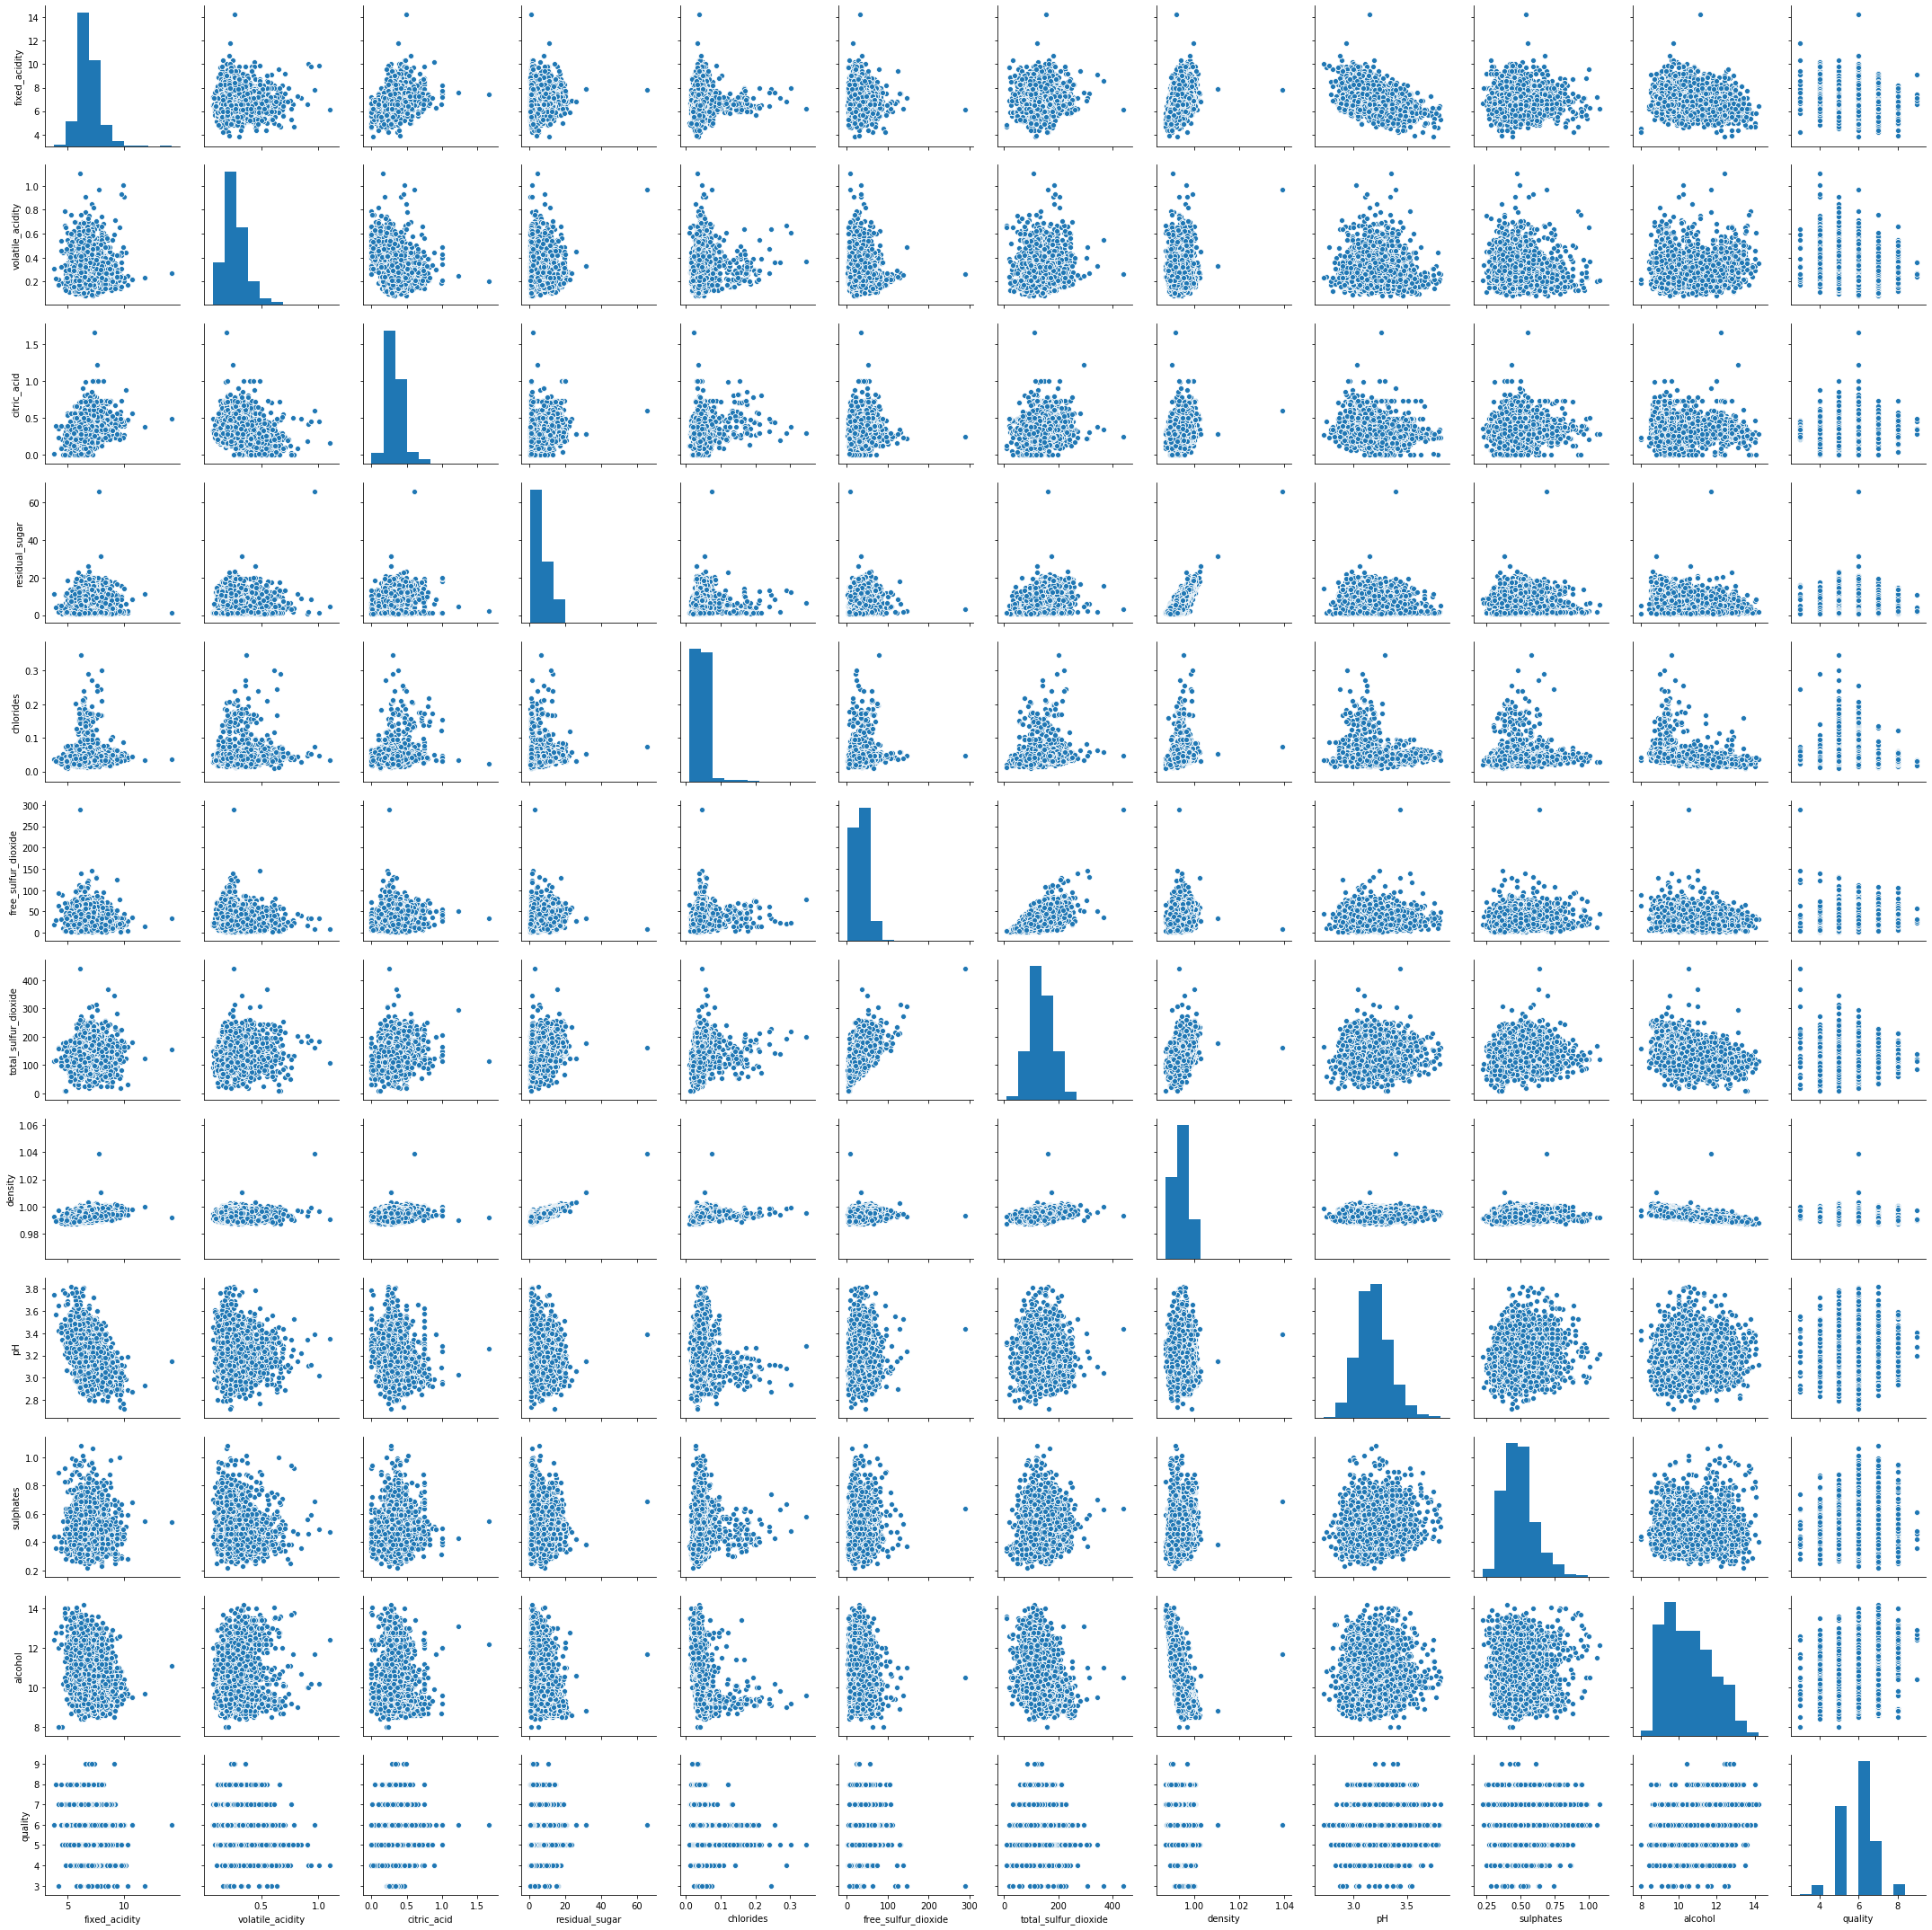

In [88]:
sns.pairplot(df)

In [89]:
print(df['quality'].unique())
print(df['quality'].nunique())
print(df['quality'].value_counts().head())

[6 5 7 8 4 3 9]
7
6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64


The wine rating varied from 3 to 9. hence, we can say that the rating index was from 0 to 10.

In [90]:
print(df['pH'].nunique())
print(df['pH'].min())
print(df['pH'].max())

103
2.72
3.82


As the pH of acidic solutions is below 7. Hence for wine, we got pH of below 4.

In [91]:
def round_ph(value) : 
    if value < 3 :
        return 0
    else :
        return 1

In [92]:
df['pH_range'] = df['pH'].apply(round_ph)

In [93]:
df['pH_range'].value_counts()

1    4461
0     437
Name: pH_range, dtype: int64

to apply classifiction on pH, we converted to a scale of (0, if range is 2-3, else 1, if range is 3-4)

Now we have 2 scenarios.
1. regression on pH scale.
2. classification on pH_range, quality.

In [94]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,pH_range
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


## Scaling of dataset

#### Scaling is needed here, as we don't know the unit of the columns.
#### Hence we have to bring every column on same scale.

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
df_target = df[['pH', 'pH_range', "quality"]]
df_other = df.drop(['pH', 'pH_range', "quality"], axis = 1)

In [97]:
df_other_scaled = scaler.fit_transform(df_other)
df_other_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
         2.33151201e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
        -9.15417164e-03,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         3.58664800e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -4.97350262e-01, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -1.78471666e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.54396243e+00, -1.48839409e+00,  1.04489089e+00]])

In [98]:
df_other_new = pd.DataFrame(df_other_scaled, columns = df_other.columns)
df_other_new.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.787342,-0.499203


In [99]:
df_final = pd.concat([df_other_new, df_target], axis = 1)

In [100]:
df_final.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,pH,pH_range,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-0.349184,-1.393152,3.00,1,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.001342,-0.824276,3.30,1,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,-0.436816,-0.336667,3.26,1,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.787342,-0.499203,3.19,1,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,-0.787342,-0.499203,3.19,1,6


## Model training and testing

### Support Vector Machine on pH column

In [101]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [105]:
x = df_final.drop(["pH_range"], axis = 1)
y = df_final['pH_range']

if we add column "quality", then our accuracy decreases. also, it doesn't seem to play a significant role

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [107]:
model = SVC()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


We got parameters for SVM from below section using Grid Search

In [108]:
print("\n metrics.classification_report : \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix : \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score : \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report : 
               precision    recall  f1-score   support

           0       0.87      0.18      0.30        73
           1       0.94      1.00      0.97       907

    accuracy                           0.94       980
   macro avg       0.90      0.59      0.63       980
weighted avg       0.93      0.94      0.92       980


 metrics.confusion_matrix : 
 [[ 13  60]
 [  2 905]]

 metrics.accuracy_score : 
 0.936734693877551


In [109]:
from sklearn.metrics import roc_auc_score, roc_curve

In [113]:
#predict probabilities
probs = model.predict_proba(xtest)
# keep possibilities for positive outcome only
probs = probs[:, 1]

AttributeError: predict_proba is not available when  probability=False

In [114]:
# calculate AUC
auc = roc_auc_score(ytest, predict)
auc

0.5879385600579964

In [115]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytest, probs)

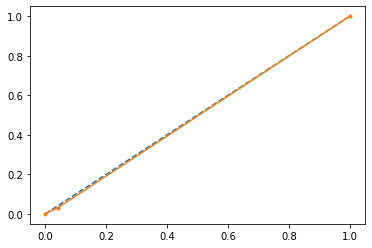

In [116]:
plt.plot([0, 1], [0, 1], linestyle='--')   #plt.plot(x, y)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Finding the best parameters, then will go above and resolve it with parameters

SVM cannot be performed on column "quality", because it is multi-class

### Done with the Trees, with accuracy of less than 0.3